# Data Classification

## Importing the required libraries

In [1]:
from numpy import genfromtxt
from sklearn import svm
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

## Loading the datasets

Each of the dataset contain a total of 10,000 points in the form of 100x100 format. All the different datapoints have been collected with the apparatus being kept at a distance of 10cm from the object. The following datasets have already been filtered.

In [2]:
dataset_plastic = genfromtxt('plastic_consolidated.csv', delimiter=',')
dataset_ceramic = genfromtxt('ceramics_consolidated.csv', delimiter=',')
dataset_wood = genfromtxt('wood_consolidated.csv', delimiter=',')

### Filtering of the datasets

The below sample shows us how the filtering of the data is done for the above loaded datasets.

In [3]:
test_dataset = genfromtxt('datasets/test_material.csv', delimiter=',')

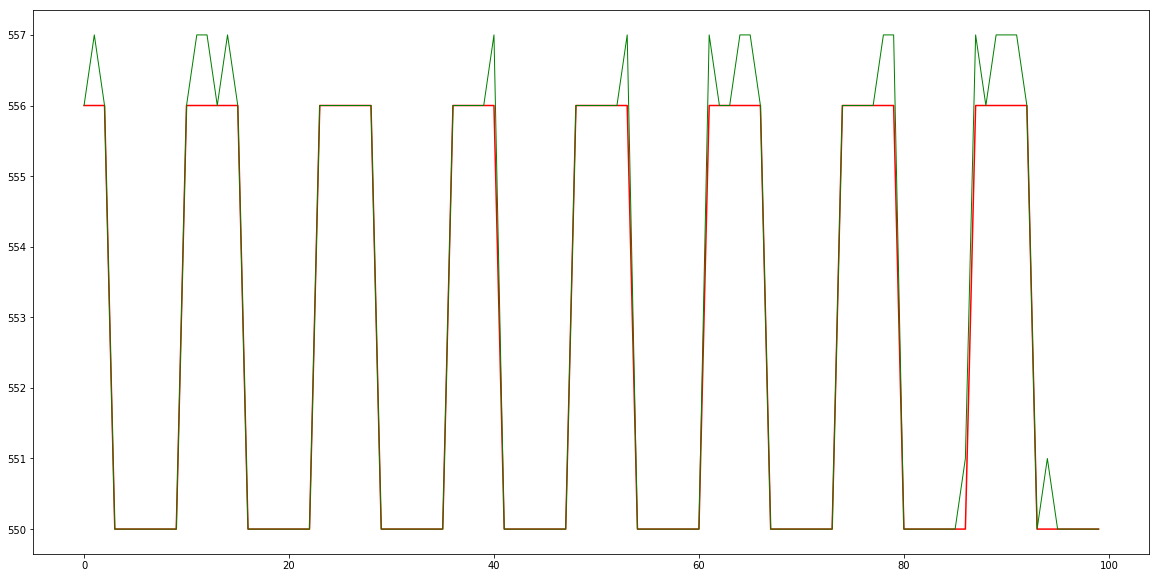

In [4]:
selected_data_signal = 49
filtered_test_dataset = [np.percentile(test_dataset[selected_data_signal], 75) if val > np.mean(test_dataset[selected_data_signal]) else np.percentile(test_dataset[selected_data_signal], 25) for val in test_dataset[selected_data_signal]]

plt.figure(figsize=(20,10))

plt.plot(filtered_test_dataset,'r', linewidth=1.5)
plt.plot(test_dataset[selected_data_signal],'g', linewidth=1)
plt.show()

## Plotting the pulse values

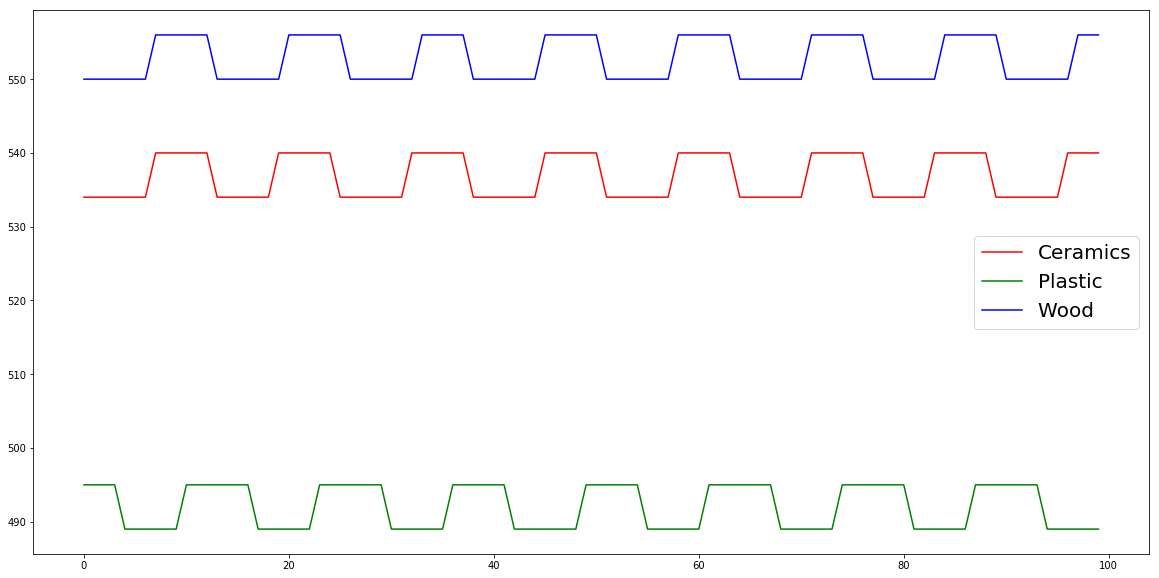

In [5]:
plt.figure(figsize=(20,10))

for i in range(49,50):
    plt.plot(dataset_ceramic[i],'r',label='Ceramics', linewidth=1.5)
    plt.plot(dataset_plastic[i],'g',label='Plastic', linewidth=1.5)
    plt.plot(dataset_wood[i],'b',label='Wood', linewidth=1.5)
plt.legend(loc='best',prop={'size': 20})
plt.show()

## Initialise classes - ListTable and ListTablePrediction

In [6]:
class ListTablePrediction(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            elif(row_count == 2):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
                
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th align = 'center'>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)

In [7]:
class ListTable(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)

In [8]:
analysis_condition = ListTable()
analysis_condition.append(['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness'])

## Calculating the parameters of the datasets

In [9]:
datapoints_len = 100

for j in range(0, 3):
    temp_data = [dataset_ceramic,dataset_plastic,dataset_wood][j]
    for i in range(0,datapoints_len):
        analysis_condition.append([np.amin(temp_data[i]),np.amax(temp_data[i]),np.ptp(temp_data[i]),
          np.percentile(temp_data[i],75),np.percentile(temp_data[i],25),
              np.median(temp_data[i]),np.mean(temp_data[i]),round(np.std(temp_data[i]),2),
              round(np.var(temp_data[i]),2),round(stats.kurtosis(temp_data[i]),2),
              round(stats.skew(temp_data[i]),2)])

analysis_condition

Min,Max,Range,75%,25%,Median,Mean,STD,Var,Kurtosis,Skewness
534.0,541.0,7.0,541.0,541.0,541.0,540.44,1.9,3.61,7.59,-3.1
534.0,540.0,6.0,540.0,534.0,534.0,536.76,2.99,8.94,-1.97,0.16
534.0,540.0,6.0,540.0,534.0,534.0,536.7,2.98,8.91,-1.96,0.2
534.0,540.0,6.0,540.0,534.0,534.0,536.82,2.99,8.97,-1.99,0.12
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08
534.0,540.0,6.0,540.0,534.0,534.0,536.82,2.99,8.97,-1.99,0.12
534.0,540.0,6.0,540.0,534.0,534.0,536.7,2.98,8.91,-1.96,0.2
534.0,540.0,6.0,540.0,534.0,534.0,536.76,2.99,8.94,-1.97,0.16
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08


## Plotting the statistics associated with a single pulse value

In [10]:
def statistics_plot(single_plot_value):
    plot_analysis = [np.amin(single_plot_value), np.amax(single_plot_value),
                     np.ptp(single_plot_value), np.percentile(single_plot_value, 75),
                     np.percentile(single_plot_value, 25), np.median(single_plot_value),
                     np.mean(single_plot_value), round(np.std(single_plot_value),2),
                     round(np.var(single_plot_value),2), round(stats.kurtosis(single_plot_value),2),
                     round(stats.skew(single_plot_value),2)]

    plt.figure(figsize=(20,10))
    datapoints = np.linspace(0,datapoints_len)

    plt.plot(single_plot_value, linewidth=1.8)

    plt.plot(datapoints, np.array([plot_analysis[0] for i in range(len(datapoints))]), 'r--', label = 'Min - '+str(plot_analysis[0]))
    plt.plot(datapoints, np.array([plot_analysis[1] for i in range(len(datapoints))]), 'b--', label = 'Max - '+str(plot_analysis[1]))

    plt.plot(datapoints, np.array([plot_analysis[5] for i in range(len(datapoints))]), 'g--', label = 'Median - '+str(plot_analysis[5]))
    plt.plot(datapoints, np.array([plot_analysis[6] for i in range(len(datapoints))]), 'y--', label = 'Mean - '+str(plot_analysis[6]))

    plt.legend(loc = 2, prop={'size': 20})

### Analysis for Ceramics

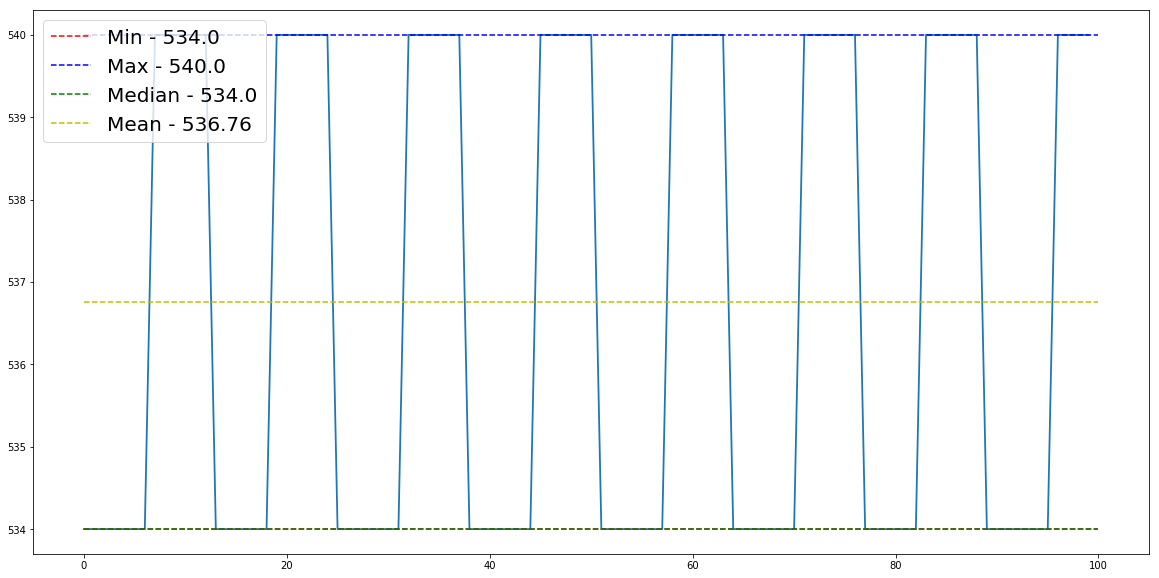

In [11]:
statistics_plot(dataset_ceramic[1])

### Analysis for Plastics

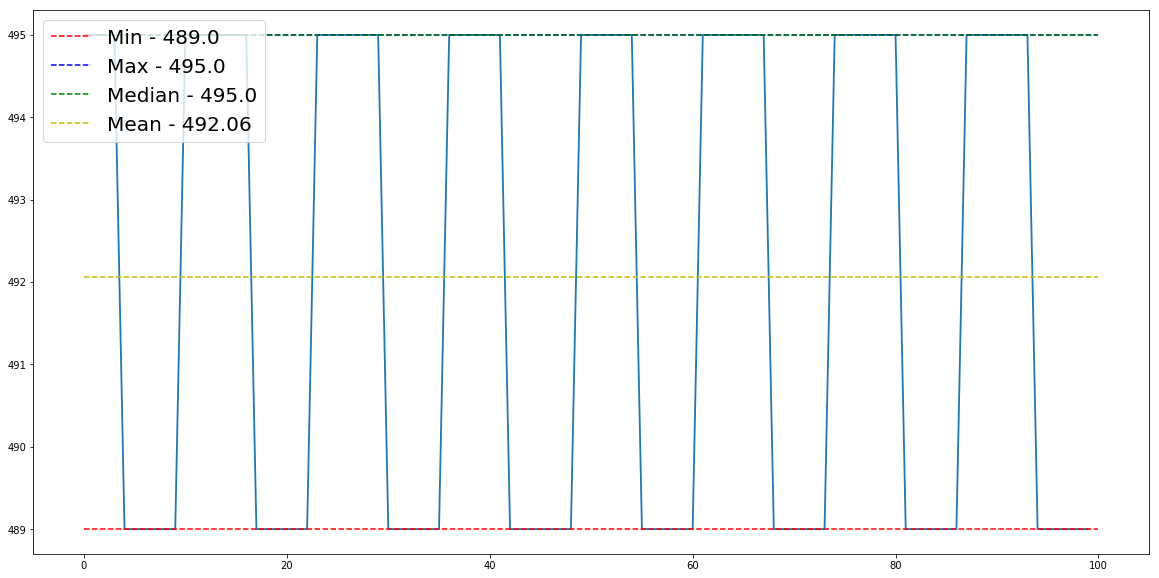

In [12]:
statistics_plot(dataset_plastic[1])

### Analysis for Wood

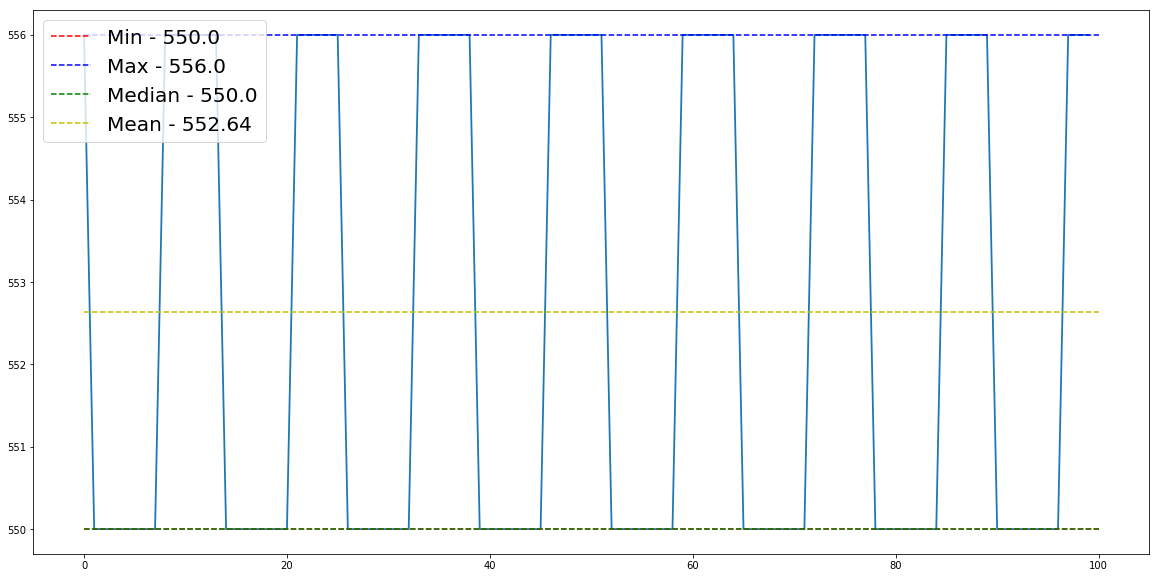

In [13]:
statistics_plot(dataset_wood[1])

## Signal Analysis

In [14]:
x_train = analysis_condition[1:]
df = pd.DataFrame(x_train)

### Bar graph representing range for Ceramics

Text(0.5, 0.05, 'Bar graph representing range for Ceramics dataset')

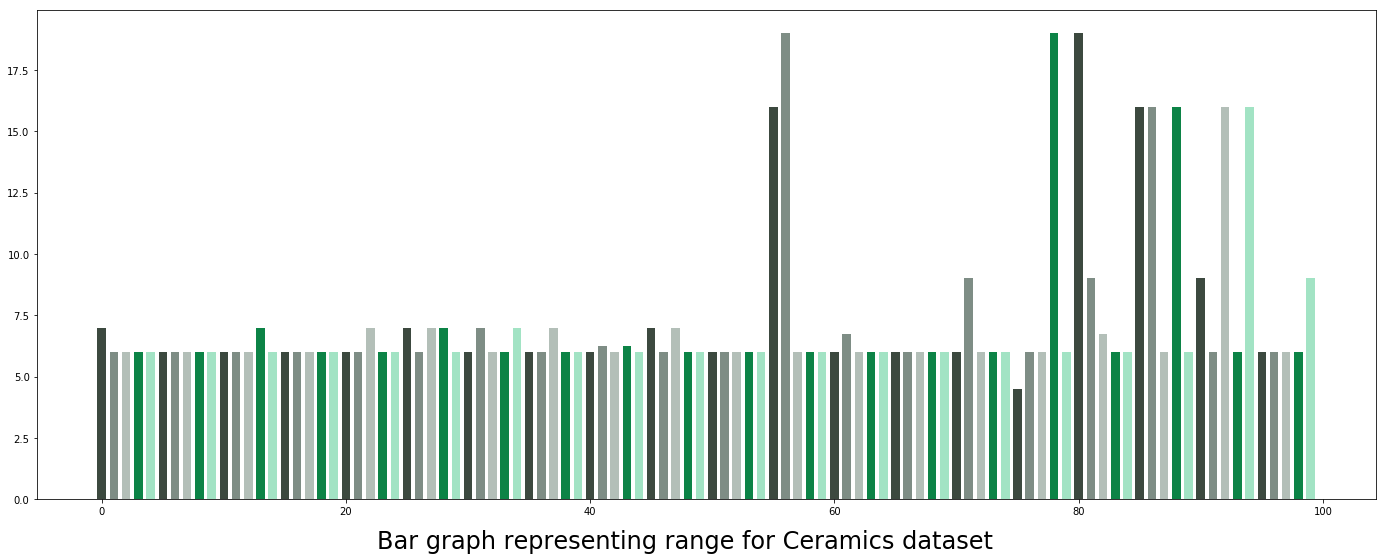

In [15]:
plt.figure(figsize=(24,9))
y_axis = np.arange(datapoints_len)

plt.grid(False)
plt.bar(y_axis,df.loc[:,2][:datapoints_len], width=0.7, color=['#3C493F', '#7E8D85', '#B3BFB8', '#0C8346', '#A2E3C4'])
plt.figtext(0.5, 0.05, "Bar graph representing range for Ceramics dataset", wrap=True, horizontalalignment='center', fontsize=24)

### Bar graph representing range for Plastics

Text(0.5, 0.05, 'Bar graph representing range for Plastic dataset')

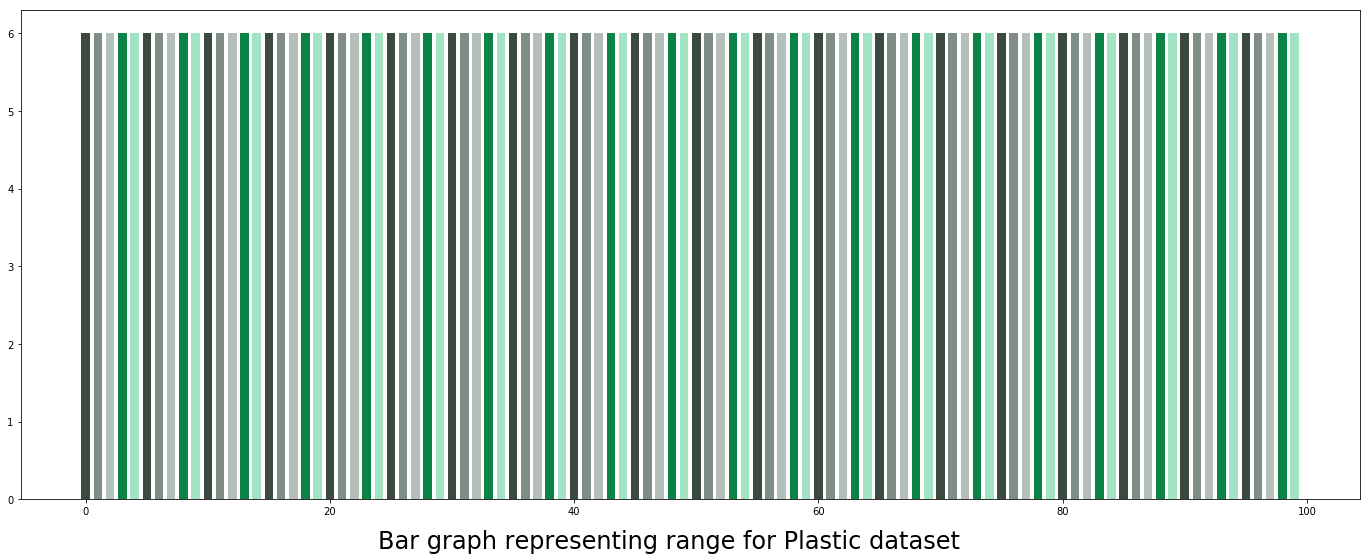

In [16]:
plt.figure(figsize=(24,9))
y_axis = np.arange(datapoints_len)

plt.grid(False)
plt.bar(y_axis,df.loc[:,2][datapoints_len:datapoints_len * 2], width=0.7, color=['#3C493F', '#7E8D85', '#B3BFB8', '#0C8346', '#A2E3C4'])
plt.figtext(0.5, 0.05, "Bar graph representing range for Plastic dataset", wrap=True, horizontalalignment='center', fontsize=24)

### Bar graph representing range for Wood

Text(0.5, 0.05, 'Bar graph representing range for Wood dataset')

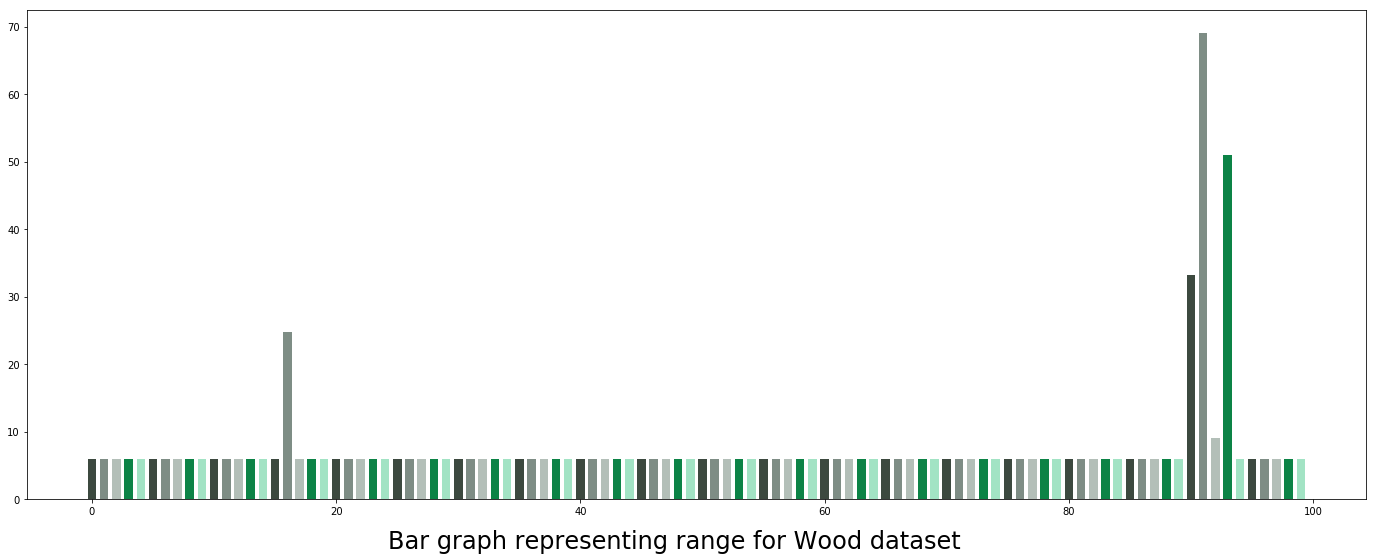

In [17]:
plt.figure(figsize=(24,9))
y_axis = np.arange(datapoints_len)

plt.grid(False)
plt.bar(y_axis,df.loc[:,2][datapoints_len * 2:datapoints_len * 3], width=0.7, color=['#3C493F', '#7E8D85', '#B3BFB8', '#0C8346', '#A2E3C4'])
plt.figtext(0.5, 0.05, "Bar graph representing range for Wood dataset", wrap=True, horizontalalignment='center', fontsize=24)

### Distribution graph for 25 percentile of Ceramics

[Text(0.5, 0, 'Distribution curve for 25 Percentile of Ceramic')]

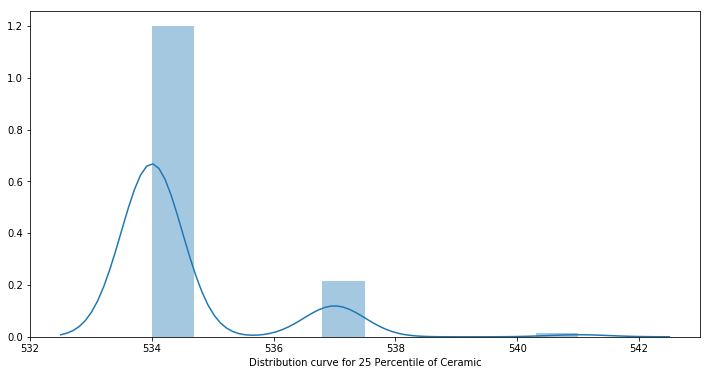

In [18]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,4][:datapoints_len])

g.grid(False)
g.set(xlabel="Distribution curve for 25 Percentile of Ceramic")

### Distribution graph for 25 percentile of Plastics

[Text(0.5, 0, 'Distribution curve for 25 Percentile of Plastic')]

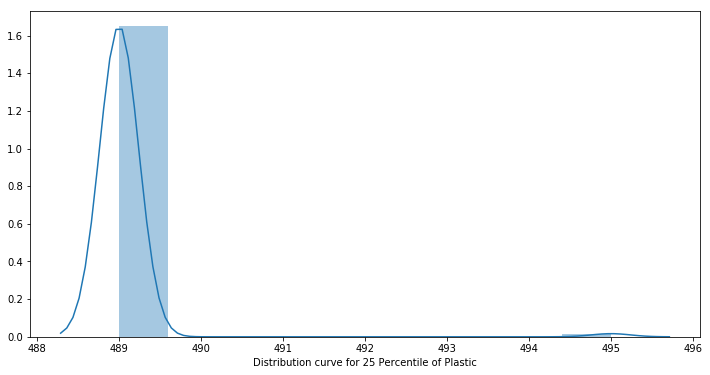

In [19]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,4][datapoints_len:datapoints_len * 2])

g.grid(False)
g.set(xlabel="Distribution curve for 25 Percentile of Plastic")

### Distribution graph for 25 percentile of Wood

[Text(0.5, 0, 'Distribution curve for 25 Percentile of Wood')]

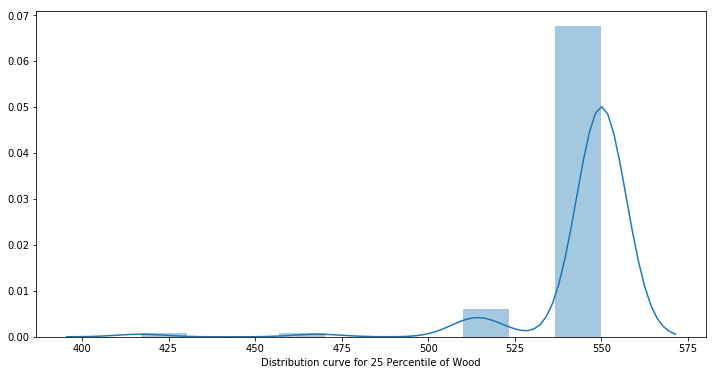

In [20]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,4][datapoints_len * 2 :datapoints_len * 3])

g.grid(False)
g.set(xlabel="Distribution curve for 25 Percentile of Wood")

### Distribution graph for 75 percentile of Ceramics

[Text(0.5, 0, 'Distribution curve for 75 Percentile of Ceramic')]

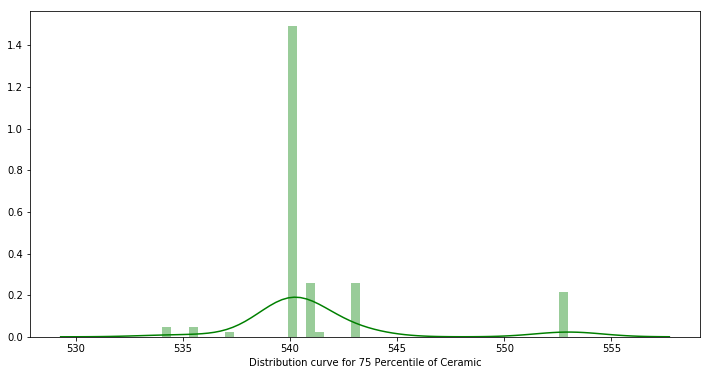

In [21]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,3][:datapoints_len],color='g')

g.grid(False)
g.set(xlabel="Distribution curve for 75 Percentile of Ceramic")

### Distribution graph for 75 percentile of Plastic

[Text(0.5, 0, 'Distribution curve for 75 Percentile of Plastic')]

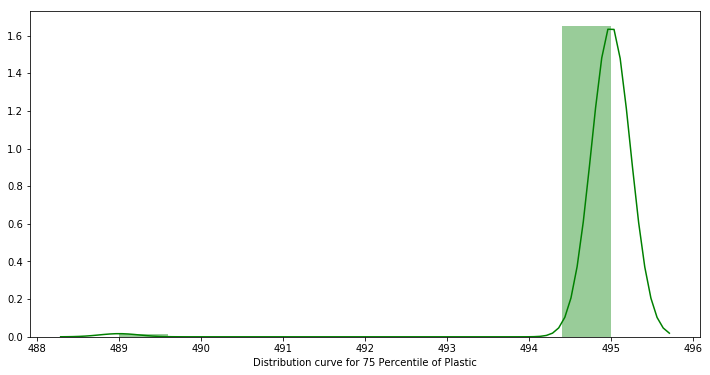

In [22]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,3][datapoints_len:datapoints_len * 2],color='g')

g.grid(False)
g.set(xlabel="Distribution curve for 75 Percentile of Plastic")

### Distribution graph for 75 percentile of Wood

[Text(0.5, 0, 'Distribution curve for 75 Percentile of Wood')]

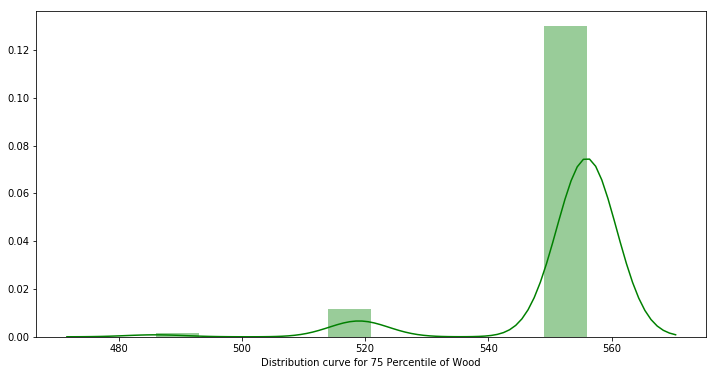

In [23]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,3][datapoints_len * 2:datapoints_len * 3],color='g')

g.grid(False)
g.set(xlabel="Distribution curve for 75 Percentile of Wood")

## Combined distribution graphs

### Distribution graph for Mean and Median of Ceramic

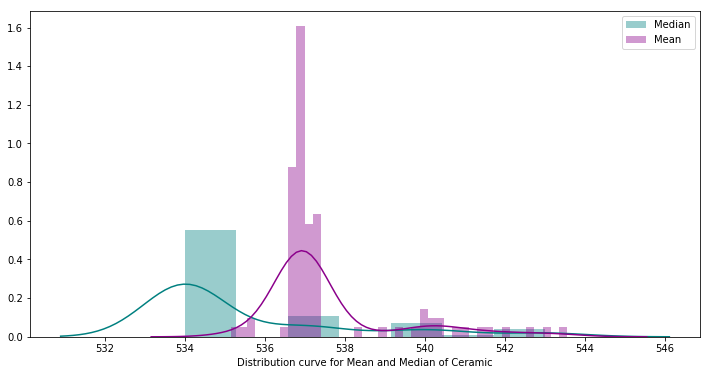

In [24]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,5][:datapoints_len],color='teal',label='Median')
g = sns.distplot(df.loc[:,6][:datapoints_len],color='darkmagenta',label='Mean')

g.set(xlabel="Distribution curve for Mean and Median of Ceramic")
plt.legend()
g.grid(False)

### Distribution graph for Mean and Median of Plastic

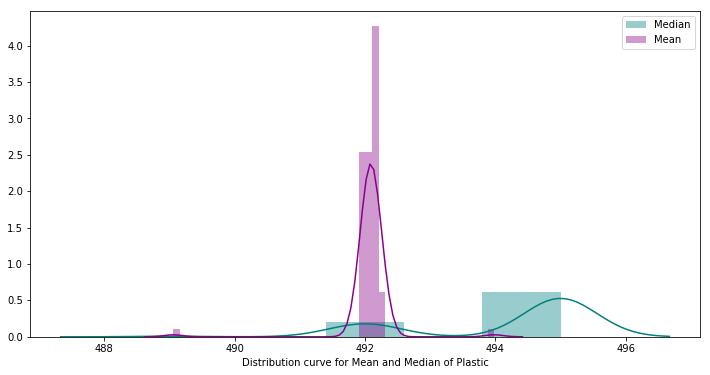

In [25]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,5][datapoints_len:datapoints_len * 2],color='teal',label='Median')
g = sns.distplot(df.loc[:,6][datapoints_len:datapoints_len * 2],color='darkmagenta',label='Mean')

g.set(xlabel="Distribution curve for Mean and Median of Plastic")
plt.legend()
g.grid(False)

### Distribution graph for Mean and Median of Wood

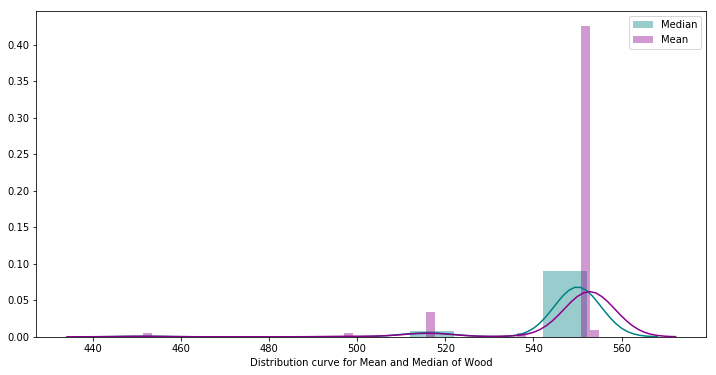

In [26]:
f, ax = plt.subplots(figsize=(12,6))
g = sns.distplot(df.loc[:,5][datapoints_len * 2:datapoints_len * 3],color='teal',label='Median')
g = sns.distplot(df.loc[:,6][datapoints_len * 2:datapoints_len * 3],color='darkmagenta',label='Mean')

g.set(xlabel="Distribution curve for Mean and Median of Wood")
plt.legend()
g.grid(False)

## Correlation Tables

### Correlation matrix for the entire dataset

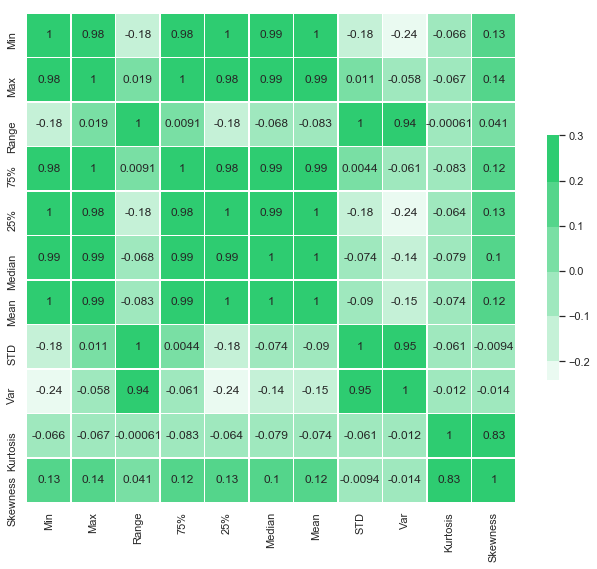

In [27]:
sns.set(style="white")

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.light_palette("#2ecc71")

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness'] )

### Correlation matrix for Ceramic

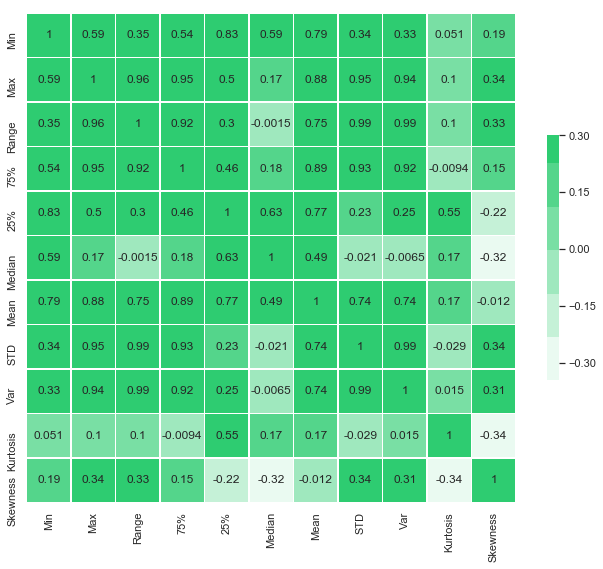

In [28]:
sns.set(style="white")

corr = df.iloc[:datapoints_len].corr()
mask = np.zeros_like(corr, dtype=np.bool)

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness'] )

### Correlation matrix for Plastic

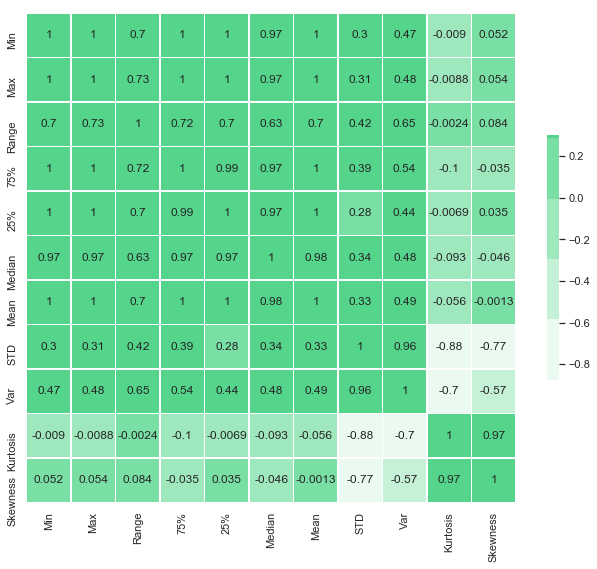

In [29]:
sns.set(style="white")

corr = df.iloc[datapoints_len - 2:datapoints_len * 2].corr()
mask = np.zeros_like(corr, dtype=np.bool)

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness'] )

### Correlation matrix for Wood

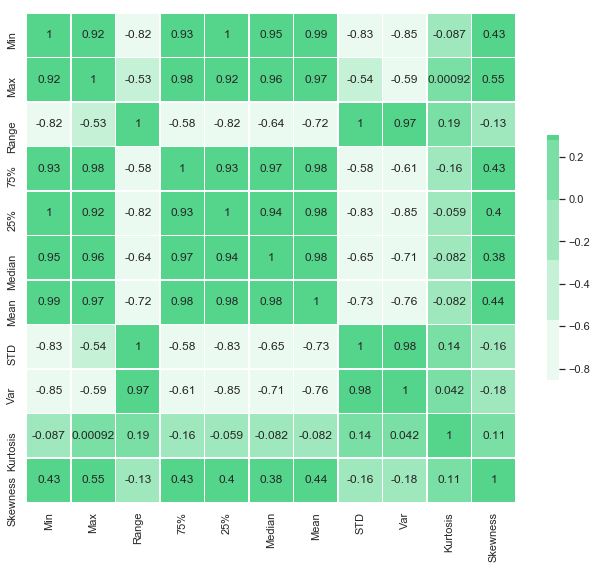

In [30]:
sns.set(style="white")

corr = df.iloc[datapoints_len * 2:].corr()
mask = np.zeros_like(corr, dtype=np.bool)

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(150, 275, s=70, l=65, n=10)
cmap = sns.light_palette("#2ecc71")

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ,annot=True,xticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness']
            , yticklabels=['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','Skewness'] )

### Plot of Varience vs Kurtosis for Ceramic

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


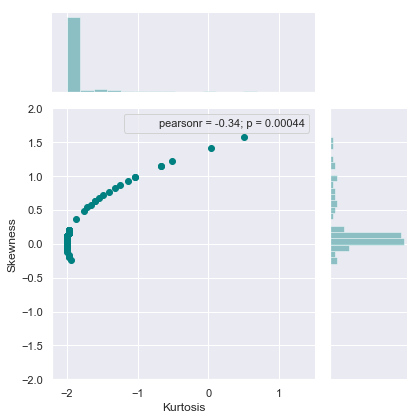

In [31]:
sns.set(style='darkgrid')
g = sns.jointplot(9, 10, data=df[:datapoints_len],
                  xlim=(-2.2,1.5), ylim=(-2, 2), color="teal",ratio=3)
g.set_axis_labels('Kurtosis', 'Skewness', fontsize=12)
g.annotate(stats.pearsonr)

### Plot of Varience vs Kurtosis for Plastic

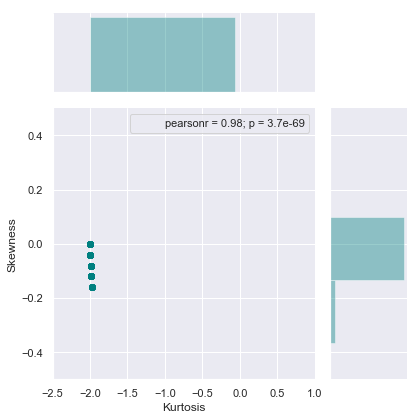

In [32]:
g = sns.jointplot(9, 10, data=df[datapoints_len:datapoints_len * 2],
                  xlim=(-2.5,1), ylim=(-0.5,0.5), color="teal",ratio=3)
g.set_axis_labels('Kurtosis', 'Skewness', fontsize=12)
g.annotate(stats.pearsonr)

### Plot of Varience vs Kurtosis for Wood

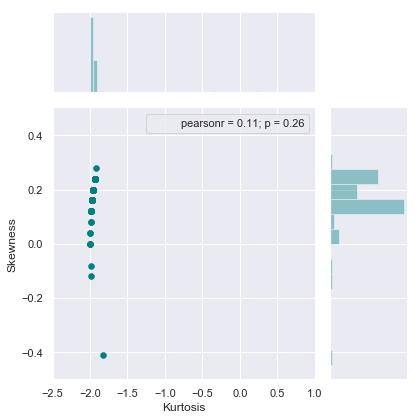

In [33]:
g = sns.jointplot(9, 10, data=df[datapoints_len * 2:datapoints_len * 3], linewidth=0.5, ratio=3,
                  xlim=(-2.5,1), ylim=(-0.5,0.5), color="teal")
g.set_axis_labels('Kurtosis', 'Skewness', fontsize=12)
g.annotate(stats.pearsonr)

## Getting ready with dataset

In [34]:
x_train = analysis_condition[1:]
df = pd.DataFrame(x_train)
df = df.drop([7,8,9,10], axis=1)

### Making a dataframe

In [35]:
x_train_array = df.as_matrix()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


### Labelling the data

In [36]:
y_train_array = []
for i in range(0,datapoints_len):
    y_train_array.append('Ceramic')
for i in range(datapoints_len,datapoints_len * 2):   
    y_train_array.append('Plastic')
for i in range(datapoints_len * 2,datapoints_len * 3):   
    y_train_array.append('Wood')
    
x_train_array = np.array(x_train_array)
x_train_array = x_train_array.reshape(x_train_array.shape[0],7)

## Testing out the Machine Learning algorithm

### Test-train split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_train_array, y_train_array, test_size=0.2,random_state=10)

### Initialising Machine Learning algorithm

In [38]:
clf = svm.SVC(probability=True,degree=11)
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=11, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
#joblib.dump(clf, 'sample_model.pkl')

In [40]:
SVM_dataframe = ListTablePrediction()
SVM_dataframe.append(['','','','SVM Parameters','','',''])
SVM_dataframe.append(['C','Cache Size','Decision Function Shape','Degree','Kernel',
                     'Probability','Tolerance'])
SVM_dataframe.append([clf.C,clf.cache_size,clf.decision_function_shape,clf.degree,
                      clf.kernel,clf.probability,clf.tol])

In [41]:
SVM_dataframe

,,,SVM Parameters,,,
C,Cache Size,Decision Function Shape,Degree,Kernel,Probability,Tolerance
1.0,200,ovr,11,rbf,True,0.001


### Confidence values of each class

In [42]:
clf.predict_proba(x_test)

array([[0.96647999, 0.01030149, 0.02321853],
       [0.96665389, 0.01027321, 0.0230729 ],
       [0.01333166, 0.97511432, 0.01155402],
       [0.00515782, 0.00831396, 0.98652823],
       [0.01344046, 0.97490902, 0.01165051],
       [0.01344046, 0.97490902, 0.01165051],
       [0.96623745, 0.01035615, 0.0234064 ],
       [0.95627877, 0.01281037, 0.03091086],
       [0.6083488 , 0.04131665, 0.35033455],
       [0.00515782, 0.00831396, 0.98652823],
       [0.00520336, 0.00833982, 0.98645681],
       [0.97011795, 0.00969058, 0.02019148],
       [0.01344046, 0.97490902, 0.01165051],
       [0.00520336, 0.00833982, 0.98645681],
       [0.00515782, 0.00831396, 0.98652823],
       [0.96665389, 0.01027321, 0.0230729 ],
       [0.00520336, 0.00833982, 0.98645681],
       [0.00514271, 0.00830538, 0.98655191],
       [0.01333166, 0.97511432, 0.01155402],
       [0.00514271, 0.00830538, 0.98655191],
       [0.96617717, 0.01034938, 0.02347344],
       [0.00514271, 0.00830538, 0.98655191],
       [0.

### Prediction of the test datapoints

In [43]:
clf.predict(x_test)

array(['Ceramic', 'Ceramic', 'Plastic', 'Wood', 'Plastic', 'Plastic',
       'Ceramic', 'Ceramic', 'Ceramic', 'Wood', 'Wood', 'Ceramic',
       'Plastic', 'Wood', 'Wood', 'Ceramic', 'Wood', 'Wood', 'Plastic',
       'Wood', 'Ceramic', 'Wood', 'Plastic', 'Ceramic', 'Plastic',
       'Ceramic', 'Plastic', 'Wood', 'Wood', 'Plastic', 'Ceramic',
       'Plastic', 'Ceramic', 'Plastic', 'Plastic', 'Wood', 'Wood',
       'Ceramic', 'Wood', 'Ceramic', 'Plastic', 'Plastic', 'Wood',
       'Ceramic', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Ceramic',
       'Ceramic', 'Wood', 'Plastic', 'Wood', 'Plastic', 'Wood', 'Plastic',
       'Wood', 'Ceramic', 'Plastic', 'Ceramic'], dtype='<U7')

In [44]:
y_pred = clf.predict(x_test)
y_true = y_test

corr = confusion_matrix(y_true, y_pred, labels=["Ceramic", "Plastic", "Wood"])

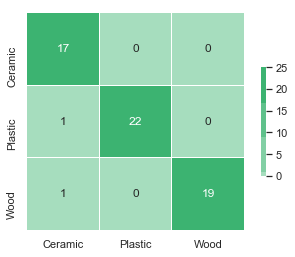

In [45]:
cmap = sns.light_palette("mediumseagreen")
mask = np.zeros_like(corr, dtype=np.bool)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=25, center=1,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}
            ,annot=True, xticklabels=['Ceramic', 'Plastic', 'Wood']
            , yticklabels=['Ceramic', 'Plastic', 'Wood'] )

### Score of the classifier

In [46]:
accuracy_score(y_true, y_pred) * 100

96.66666666666667